# Importing Necessary Libraries

In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import yfinance as yf

#Using NVIDIA Stock Dataset


In [4]:
nvda = yf.download("NVDA", start="2015-01-01", end=dt.datetime.now().strftime('%Y-%m-%d'))

/tmp/ipython-input-4-2269015160.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda = yf.download("NVDA", start="2015-01-01", end=dt.datetime.now().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


In [6]:
print(nvda)
df= nvda

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2015-01-02    0.483065    0.486665    0.475386    0.483065  113680000
2015-01-05    0.474906    0.484505    0.472747    0.483066  197952000
2015-01-06    0.460508    0.476106    0.460028    0.475626  197764000
2015-01-07    0.459308    0.467947    0.457868    0.463868  321808000
2015-01-08    0.476586    0.479466    0.464348    0.464588  283780000
...                ...         ...         ...         ...        ...
2025-06-13  141.970001  143.580002  140.850006  142.479996  180820600
2025-06-16  144.690002  146.179993  143.199997  143.350006  183133700
2025-06-17  144.119995  145.220001  143.779999  144.490005  139108000
2025-06-18  145.479996  145.649994  143.119995  144.009995  161494100
2025-06-20  143.850006  146.199997  142.649994  145.449997  242403400

[2632 rows x 5 colu

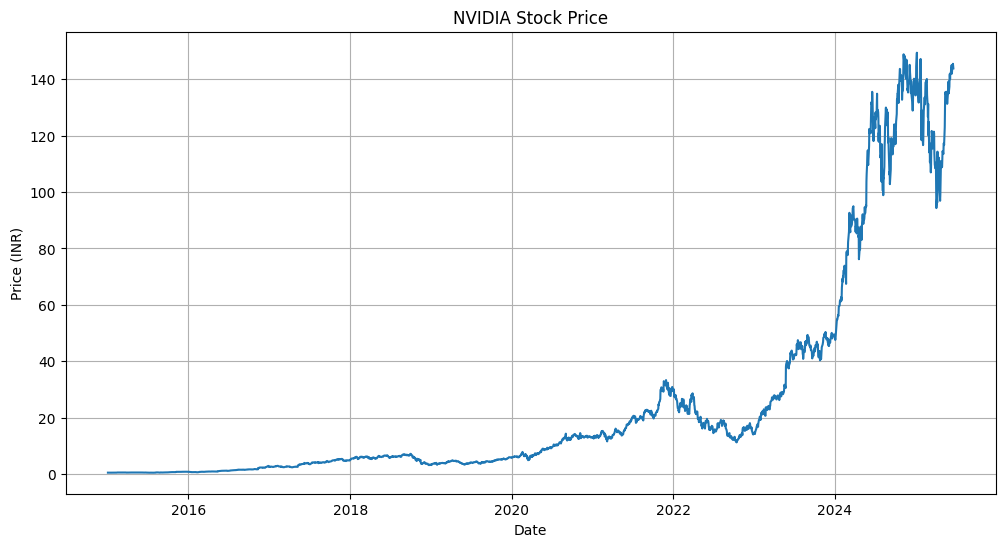

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("NVIDIA Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

#Plot Moving Averages for 100 days

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,NVDA
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2025-06-13,122.487823
2025-06-16,122.464261
2025-06-17,122.433498


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

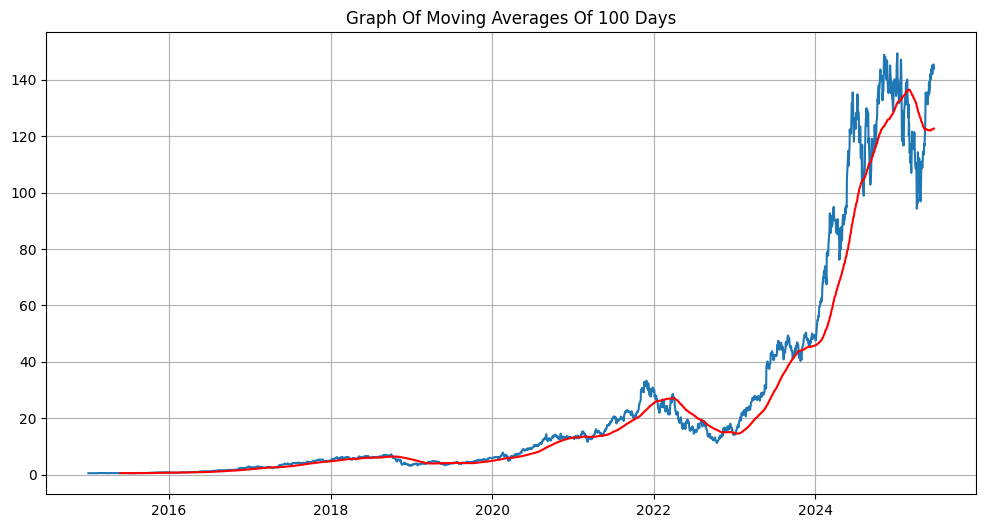

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

#Dividing Dataset into Training(80%) and Testing(20%) Set

---



In [37]:
train = pd.DataFrame(df[0:int(len(df)*0.80)])
test = pd.DataFrame(df[int(len(df)*0.80): int(len(df))])

print(train.shape)
print(test.shape)

(2105, 5)
(527, 5)


In [38]:
train.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483065,0.486665,0.475386,0.483065,113680000
2015-01-05,0.474906,0.484505,0.472747,0.483066,197952000
2015-01-06,0.460508,0.476106,0.460028,0.475626,197764000
2015-01-07,0.459308,0.467947,0.457868,0.463868,321808000
2015-01-08,0.476586,0.479466,0.464348,0.464588,283780000


In [39]:
test.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-05-15,28.932196,28.948185,28.131773,28.487516,293926000
2023-05-16,29.192013,29.848542,28.811288,28.820280,449405000
2023-05-17,30.156321,30.177305,29.408859,29.562747,432535000
2023-05-18,31.655241,31.805133,30.298217,30.388152,748725000
2023-05-19,31.241537,31.557310,30.893788,31.513341,473908000


#Normalization using MinMax Scaler

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [42]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01681976],
       [0.03996836],
       [0.03991671],
       ...,
       [0.08704951],
       [0.07408391],
       [0.06091889]])

In [43]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

#LSTM Model for NVIDIA Stock Prediction

In [44]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

#Training LSTM Model

In [47]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 244ms/step - loss: 0.0075 - mean_absolute_error: 0.0643
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - loss: 0.0058 - mean_absolute_error: 0.0494
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - loss: 0.0046 - mean_absolute_error: 0.0459
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step - loss: 0.0047 - mean_absolute_error: 0.0460
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - loss: 0.0045 - mean_absolute_error: 0.0439
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - loss: 0.0047 - mean_absolute_error: 0.0452
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - loss: 0.0049 - mean_absolute_error: 0.0469
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - loss: 0.0053 - mean_absolute_error: 0.0442
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - loss: 0.0049 - mean_absolute_error: 0.0440
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - loss: 0.0047 - mean_absolute_error: 0.0422
Epoch 11/

In [48]:
model.save('keras_model.h5')

In [49]:
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)

Defining the final dataset for testing by including last 100 columns of the training dataset to get the prediction from the 1st column of the testing dataset.

In [50]:
past_100_days

,0
0,354039000
1,403260000
2,325025000
3,565045000
4,349326000
...,...
95,344979000
96,314869000
97,369350000
98,322149000


In [51]:
final_df = pd.concat([past_100_days,test_df])

In [52]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1729844 ],
       [0.20719525],
       [0.15281834],
       [0.31964325],
       [0.16970865],
       [0.25003927],
       [0.17091803],
       [0.17359882],
       [0.14271585],
       [0.20581698],
       [0.22670102],
       [0.19740067],
       [0.20843522],
       [0.27737473],
       [0.19387887],
       [0.17246034],
       [0.3101656 ],
       [0.23779604],
       [0.28215039],
       [0.2324699 ],
       [0.24171957],
       [0.31958903],
       [0.38227939],
       [0.2717956 ],
       [0.23935989],
       [0.26716033],
       [0.30372461],
       [0.26651811],
       [0.27305571],
       [0.38597286],
       [0.31910876],
       [0.22534012],
       [0.24120871],
       [0.38852577],
       [0.31589417],
       [0.2910289 ],
       [0.30969853],
       [0.25700154],
       [0.39639647],
       [0.21922997],
       [0.21328803],
       [0.25072459],
       [0.21189029],
       [0.28359747],
       [0.70396885],
       [0.33679072],
       [0.24176266],
       [0.243

#Testing the Model

In [53]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1729844 ],
       [0.20719525],
       [0.15281834],
       [0.31964325],
       [0.16970865],
       [0.25003927],
       [0.17091803],
       [0.17359882],
       [0.14271585],
       [0.20581698],
       [0.22670102],
       [0.19740067],
       [0.20843522],
       [0.27737473],
       [0.19387887],
       [0.17246034],
       [0.3101656 ],
       [0.23779604],
       [0.28215039],
       [0.2324699 ],
       [0.24171957],
       [0.31958903],
       [0.38227939],
       [0.2717956 ],
       [0.23935989],
       [0.26716033],
       [0.30372461],
       [0.26651811],
       [0.27305571],
       [0.38597286],
       [0.31910876],
       [0.22534012],
       [0.24120871],
       [0.38852577],
       [0.31589417],
       [0.2910289 ],
       [0.30969853],
       [0.25700154],
       [0.39639647],
       [0.21922997],
       [0.21328803],
       [0.25072459],
       [0.21189029],
       [0.28359747],
       [0.70396885],
       [0.33679072],
       [0.24176266],
       [0.243

In [54]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [55]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(527, 100, 1)
(527,)


# Making Predictions and Plotting Graph of Predicted vs Actual

In [56]:
# Making predictions

y_pred = model.predict(x_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


In [57]:
scaler.scale_

array([6.95045852e-10])

In [58]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

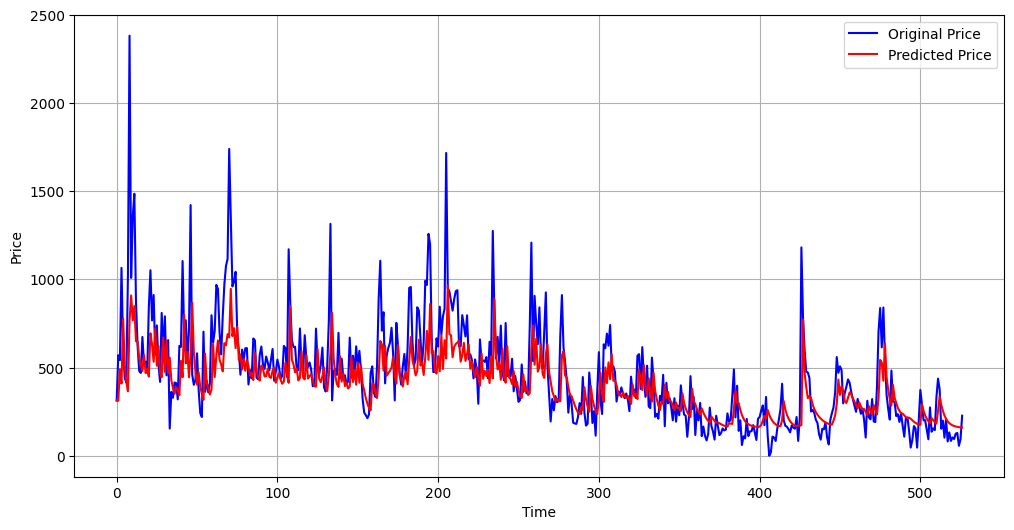

In [59]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#Model Evaluation

In [60]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 29.54%


In [61]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.4563181948339814
